In [4]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [5]:
usa = gpd.read_file('data/map.geojson')
print(usa.crs)
usa.head()

epsg:4326


,geometry


In [6]:
stadiums = pd.read_csv('data/CloudProject-master/NFL_Stadium_Latitude_and_Longtitude.csv')
print(stadiums.shape)
stadiums.head()

(32, 7)


,Team,Conference,latitude,longitude,zip,pic,Unnamed: 6
0,Titans,AFC,36.166461,-86.771289,37213,y,g
1,Giants,NFC,40.812194,-74.076983,10021,y,NaN
2,Steelers,AFC,40.446786,-80.015761,15202,y,NaN
3,Panthers,NFC,35.225808,-80.852861,28202,y,g
4,Ravens,AFC,39.277969,-76.622767,21203,y,g


In [36]:
stadiums = stadiums.loc[stadiums['Team'].isin(['Titans', 'Texans', 'Raiders', 'Chargers',
             'Rams'])]

In [37]:
stadiums['geometry'] = stadiums.apply(lambda x:  Point((float(x.longitude),
                                                       float(x.latitude))),
                                     axis=1)
stadiums.head()

<ipython-input-37-b1176d38fc35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stadiums['geometry'] = stadiums.apply(lambda x:  Point((float(x.longitude),


,Team,Conference,latitude,longitude,zip,pic,Unnamed: 6,geometry
0,Titans,AFC,36.166461,-86.771289,37213,y,g,POINT (-86.771289 36.166461)
19,Chargers,AFC,32.783117,-117.119525,92103,y,NaN,POINT (-117.119525 32.783117)
21,Texans,AFC,29.684781,-95.410956,77002,y,NaN,POINT (-95.410956 29.684781)
26,Raiders,AFC,37.751411,-122.200889,94502,y,g,POINT (-122.200889 37.751411)
28,Rams,NFC,38.632975,-90.188547,63101,y,NaN,POINT (-90.188547 38.632975)


In [38]:
usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
stadiums_geo = gpd.GeoDataFrame(stadiums,
                               crs = usa.crs,
                               geometry = stadiums['geometry'])

In [40]:
type(stadiums_geo)

geopandas.geodataframe.GeoDataFrame

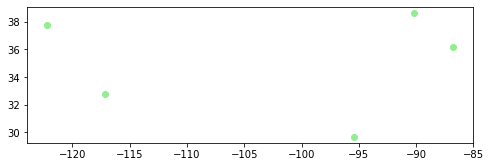

In [41]:
ax = stadiums_geo.plot(figsize = (8, 10), color = 'lightgreen')
plt.show()

In [42]:
stadiums_geo.geometry.centroid

<ipython-input-42-e8d415192319>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stadiums_geo.geometry.centroid


0      POINT (-86.77129 36.16646)
19    POINT (-117.11952 32.78312)
21     POINT (-95.41096 29.68478)
26    POINT (-122.20089 37.75141)
28     POINT (-90.18855 38.63298)
dtype: geometry

In [44]:
center = stadiums_geo.geometry.centroid[21]
print(center)

POINT (-95.410956 29.684781)


<ipython-input-44-fcc4293093d6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = stadiums_geo.geometry.centroid[21]


In [45]:
area_center = [center.y, center.x]

print(area_center)

[29.684781, -95.410956]


In [46]:
map_stadiums = folium.Map(location = area_center, zoom_start = 4)
map_stadiums

In [49]:
map_stadiums = folium.Map(location = area_center, zoom_start = 3.5)

folium.GeoJson(stadiums_geo).add_to(map_stadiums)

for row_index, row_values in stadiums.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['Team'])
    icon=folium.Icon(color="blue",icon="home", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_stadiums)
map_stadiums.save('map_stadiums.html')

map_stadiums